<a href="https://colab.research.google.com/github/zunaed-88/Concrete_Cracks/blob/main/Concrete_Crack_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction


I am building an image classifier using the VGG16 pre-trained model, and will evaluate it and compare its performance with ResNet50 pre-trained model.

## Data Collection

In [ ]:
pip install wget

In [ ]:
!python -m wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [4]:
#Unzipping the data
import zipfile
zip_ref = zipfile.ZipFile('/content/concrete_data_week4.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
#Importing libraries
import numpy as np
import tensorflow
from keras.preprocessing.image import ImageDataGenerator

In [6]:
#Setting the paths to directories
train_path = '/content/concrete_data/train'
test_path = '/content/concrete_data/test'
valid_path='/content/concrete_data/valid'

In [7]:
#Setting some parameters
batch_size = 100
image_width = 224
image_height = 224

In [9]:
#Defining the image generator
image_gen = ImageDataGenerator(rescale = 1./255)

In [10]:
#Making training set
train_ds = image_gen.flow_from_directory(directory =
                                       train_path,
                                       target_size=(image_width,image_height),
                                       batch_size = batch_size,
                                       seed = 24,
                                       class_mode ='categorical'
)

Found 30001 images belonging to 2 classes.


In [11]:
#Making Validation set
valid_ds = image_gen.flow_from_directory(directory =
                                       valid_path,
                                       target_size=(224,224),
                                       batch_size = batch_size,
                                       seed = 24,
                                       class_mode ='categorical'
)

Found 9501 images belonging to 2 classes.


In [12]:
# Checking the classes and their labels
classes = train_ds.class_indices
classes

{'negative': 0, 'positive': 1}

**<h2>Defining the pretrained VGG16 model**

In [13]:
# Importing libraries for architecture
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [14]:
#Defining the layers
model = Sequential()


In [15]:
#Adding VGG16 in the model
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    input_shape = (224,224,3)))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

In [17]:
# Adding the custom classifier to VGG16
model.add(Dense(2, activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].layers

In [20]:
#Freezing all VGG16 extracting layers
model.layers[0].trainable = False

In [ ]:
model.summary()

In [22]:
#Compiling the model with our custom classifier with binary classification
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# training the model
%%time
history_vgg = model.fit_generator(train_ds,steps_per_epoch=len(train_ds) , epochs=2, verbose=1,validation_steps=len(valid_ds) ,validation_data= valid_ds)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/2
301/301 [==============================] - 180s 595ms/step - loss: 0.3183 - accuracy: 0.9253 - val_loss: 0.1640 - val_accuracy: 0.9737
Epoch 2/2
301/301 [==============================] - 179s 595ms/step - loss: 0.1212 - accuracy: 0.9831 - val_loss: 0.0910 - val_accuracy: 0.9874
CPU times: user 3min 41s, sys: 1min 27s, total: 5min 9s
Wall time: 5min 59s


In [ ]:
# Save the complete custom model for future reference
model.save('vgg16_concrete_cracks_classifier.h5')

Use the following cells to evaluate your models.

In [24]:
from tensorflow.keras.models import load_model

<h2> Evaluating ResNet50 Model

In [ ]:
#load ResNet50 model
model_resnet = load_model('classifier_resnet_model.h5')

In [ ]:
model_resnet.summary()

In [ ]:
# Generating the test set
test_ds = image_gen.flow_from_directory(directory =
                                       test_path,
                                       target_size=(224,224),
                                       batch_size = 5,
                                       seed = 24,
                                       shuffle = False,
                                       class_mode ='categorical'
)

Found 500 images belonging to 2 classes.


In [ ]:
#Calculating the test loss and test accuracy for ResNet50
test_loss_resnet, test_accuracy_resnet =model_resnet.evaluate_generator(test_ds)

<ipython-input-44-61700d9510e4>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss_resnet, test_accuracy_resnet =model_resnet.evaluate_generator(test_ds)


In [ ]:
#print the Results
print(f'test loss Resnet is {test_loss_resnet:0.3} and test accuracy Resnet is {test_accuracy_resnet:0.1%}')


test loss Resnet is 2.2 and test accuracy Resnet is 50.0%


<h2> Evaluating the performance of VGG16 Model

In [ ]:
#loading VGG16 model
model_vgg = load_model('vgg16_concrete_cracks_classifier_E1.h5')

In [ ]:
model_vgg.summary()

In [ ]:
#Calculating the test loss and accuracy for VGG16
test_loss_vgg, test_accuracy_vgg =model_vgg.evaluate_generator(test_ds)

<ipython-input-139-e29bb4ac1631>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss_vgg, test_accuracy_vgg =model_vgg.evaluate_generator(test_ds)


In [ ]:
#printing the results
print(f'test loss Vgg16 is {test_loss_vgg:0.3} and test accuracy Vgg16 is {test_accuracy_vgg:0.1%}')

test loss Vgg16 is 0.0926 and test accuracy Vgg16 is 98.6%


<a id="item44"></a>

<h2>Predictions on ResNet50

In [ ]:
# Importing the libraries for display and prediction
import cv2
from cv2 import imread
from tensorflow.keras.utils import img_to_array, load_img, array_to_img

In [ ]:
#first batch of test images are all negative
first_batch_labels = test_ds.next()[1]
first_batch_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
'''########################## Making 1st prediction on ResNet50 ############################'''

testImage='/content/concrete_data/test/positive/19751.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_resnet.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Positve')
plt.show()
if np.argmax(result) == 0:
  print('Our model ResNet predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model ResNet50 Predicts positive class i.e. cracks on the image ')

<ipython-input-105-f1816a4250d4>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  result=model_resnet.predict_generator(test_image,verbose=0)


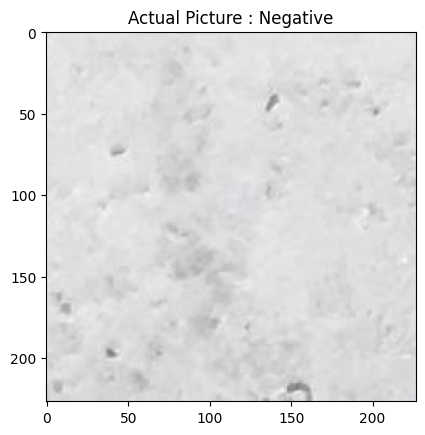

Our model ResNet predicts negative class correctly i.e.no cracks in the image


In [ ]:
'''########################## Making 2nd prediction on ResNet50 ############################'''

testImage='/content/concrete_data/test/negative/19751.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_resnet.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Negative')
plt.show()
if np.argmax(result) == 0:
  print('Our model ResNet predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model ResNet50 Predicts positive class i.e. cracks on the image ')

<ipython-input-106-7867e588c4b2>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  result=model_resnet.predict_generator(test_image,verbose=0)


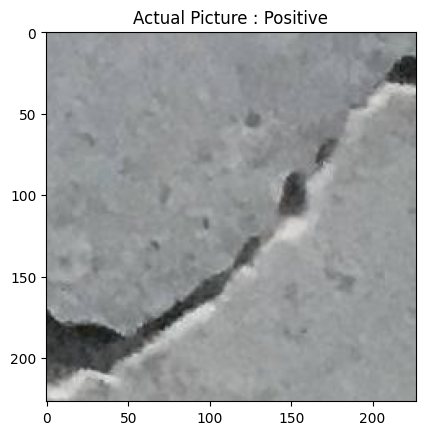

Our Model ResNet50 Predicts positive class i.e. cracks on the image 


In [ ]:
'''########################## Making 3rd prediction on ResNet50 ############################'''

testImage='/content/concrete_data/test/positive/19752.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_resnet.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Positive')
plt.show()
if np.argmax(result) == 0:
  print('Our model ResNet predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model ResNet50 Predicts positive class i.e. cracks on the image ')

In [ ]:
'''########################## Making 4th prediction on ResNet50 ############################'''

testImage='/content/concrete_data/test/positive/19753.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_resnet.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Positive')
plt.show()
if np.argmax(result) == 0:
  print('Our model ResNet predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model ResNet50 Predicts positive class i.e. cracks on the image ')

In [ ]:
'''########################## Making 5th prediction on ResNet50 ############################'''

testImage='/content/concrete_data/test/negative/19752.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_resnet.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Negative')
plt.show()
if np.argmax(result) == 0:
  print('Our model ResNet predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model ResNet50 Predicts positive class i.e. cracks on the image ')

**<h2>Predictions on VGG16**

In [ ]:
'''########################## Making 1st VGG16 prediction ############################'''

testImage='/content/concrete_data/test/positive/19751.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_vgg.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Positve')
plt.show()
if np.argmax(result) == 0:
  print('Our model VGG16 predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model VGG16 Predicts positive class i.e. cracks on the image ')

In [ ]:
'''########################## Making 2nd prediction on VGG16 ############################'''

testImage='/content/concrete_data/test/negative/19751.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_vgg.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Negative')
plt.show()
if np.argmax(result) == 0:
  print('Our model VGG16 predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model VGG16 Predicts positive class i.e. cracks on the image ')

In [ ]:
'''########################## Making 3rd prediction on VGG16 ############################'''

testImage='/content/concrete_data/test/positive/19752.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_vgg.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Positive')
plt.show()
if np.argmax(result) == 0:
  print('Our model VGG16 predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model VGG16 Predicts positive class i.e. cracks on the image ')

In [ ]:
'''########################## Making 4th prediction on VGG16 ############################'''

testImage='/content/concrete_data/test/positive/19753.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_vgg.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Positive')
plt.show()
if np.argmax(result) == 0:
  print('Our model VGG16 predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model VGG16 Predicts positive class i.e. cracks on the image ')

In [ ]:
'''########################## Making 5th prediction on VGG16 ############################'''

testImage='/content/concrete_data/test/negative/19752.jpg'
test_image=load_img(testImage,target_size=(224, 224))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model_vgg.predict_generator(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('Actual Picture : Negative')
plt.show()
if np.argmax(result) == 0:
  print('Our model VGG16 predicts negative class correctly i.e.no cracks in the image')
else:
  print('Our Model VGG16 Predicts positive class i.e. cracks on the image ')